In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df_raw = pd.read_csv('../DATA/stock_market_data.csv', skiprows=3, header=None)

columns = [
    'Date', 
    'AAPL_Close', 'MSFT_Close', 'TSLA_Close',
    'AAPL_High', 'MSFT_High', 'TSLA_High',
    'AAPL_Low', 'MSFT_Low', 'TSLA_Low',
    'AAPL_Open', 'MSFT_Open', 'TSLA_Open',
    'AAPL_Vol', 'MSFT_Vol', 'TSLA_Vol'
]
df_raw.columns = columns

In [3]:
df_raw['Date'] = pd.to_datetime(df_raw['Date'])

for col in columns[1:]:
    df_raw[col] = pd.to_numeric(df_raw[col], errors='coerce')

In [4]:
df = df_raw[['Date', 'AAPL_Close', 'MSFT_Close', 'TSLA_Close']].copy()
df.set_index('Date', inplace=True)
df = df.dropna()

# Comparative Analysis of Tech Giants: AAPL, MSFT, and TSLA
The goal of this project is to analyze the historical performance, risk, and correlation of three major technology companies: **Apple, Microsoft, and Tesla** (2018-2026).

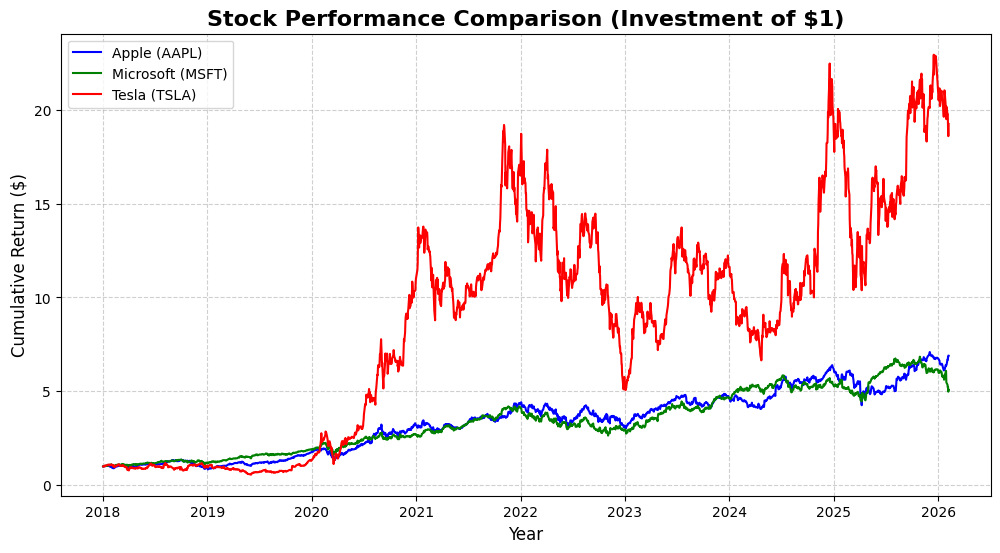

In [5]:
# Normalize the data: divide every price by the starting price
df_norm = df / df.iloc[0]

plt.figure(figsize=(12,6))

# Plotting the normalized growth lines
plt.plot(df_norm['AAPL_Close'], label='Apple (AAPL)', color='blue')
plt.plot(df_norm['MSFT_Close'], label='Microsoft (MSFT)', color='green')
plt.plot(df_norm['TSLA_Close'], label='Tesla (TSLA)', color='red')

plt.title('Stock Performance Comparison (Investment of $1)', fontsize=16, fontweight='bold')
plt.xlabel('Year', fontsize=12)
plt.ylabel('Cumulative Return ($)', fontsize=12)

plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)

plt.show()

* **Tesla (TSLA)** shows the highest growth potential, significantly outperforming Apple and Microsoft over the long term.
  
* **Apple (AAPL) and Microsoft (MSFT)** demonstrate more stable and consistent upward trends.

* **Market Trend:** In 2025, there is a visible sharp decline across all three assets, suggesting a broader market correction or sector-specific downturn.

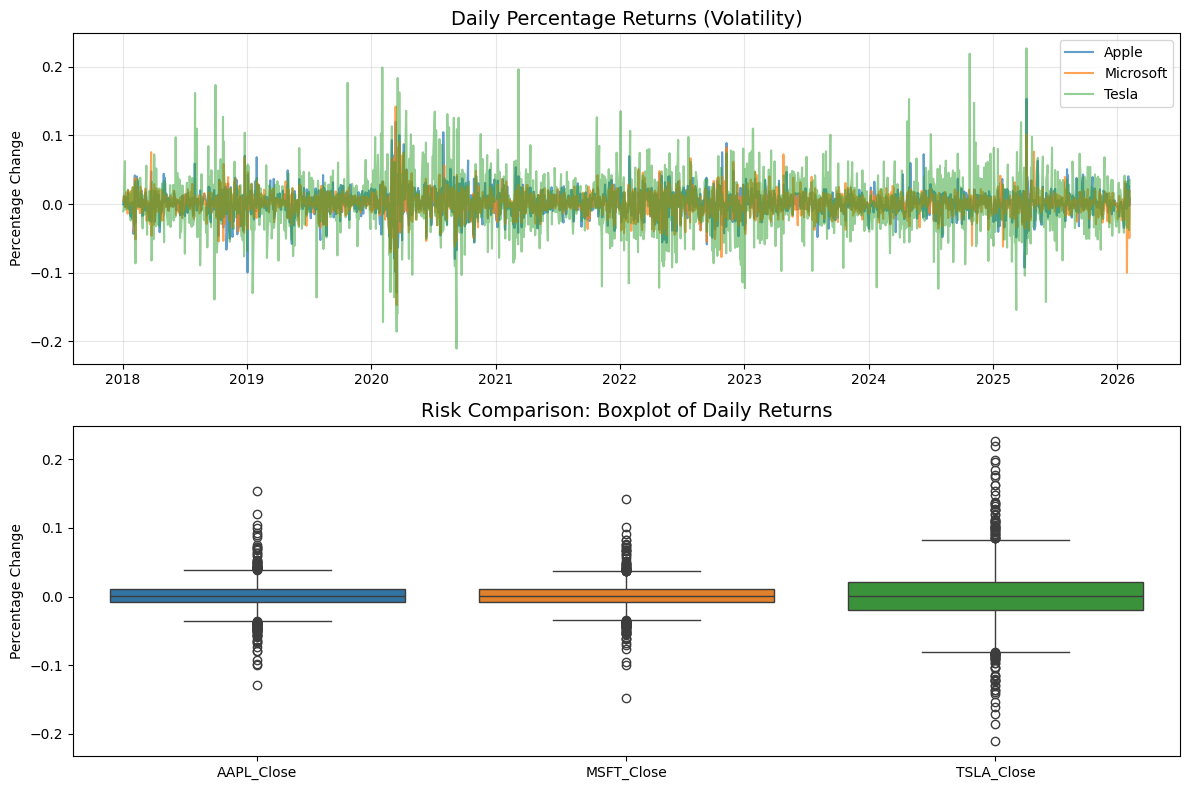

In [6]:
# Calculate daily returns to measure volatility
returns = df.pct_change().dropna()

fig, (ax1, ax2) = plt.subplots(2,1, figsize=(12,8))

# This shows how "noisy" the stocks were over time
ax1.plot(returns['AAPL_Close'], label='Apple', alpha=0.7)
ax1.plot(returns['MSFT_Close'], label='Microsoft', alpha=0.7)
ax1.plot(returns['TSLA_Close'], label='Tesla', alpha=0.5)
ax1.set_title('Daily Percentage Returns (Volatility)', fontsize=14)
ax1.set_ylabel('Percentage Change')

ax1.legend()
ax1.grid(True, alpha=0.3)

# Boxplots help visualize outliers and the spread of daily fluctuations
sns.boxplot(data=returns, ax=ax2)
ax2.set_title('Risk Comparison: Boxplot of Daily Returns', fontsize=14)
ax2.set_ylabel('Percentage Change')

plt.tight_layout()
plt.show()

* **The daily returns analysis confirms that Tesla (TSLA) is the most volatile asset, with significantly wider spreads and longer "whiskers" on the boxplot.**

* **Apple (AAPL) and Microsoft (MSFT) exhibit much tighter distributions, making them safer choices for conservative investors.**

* **A noticeable spike in negative volatility across all three companies occurred in 2025.**

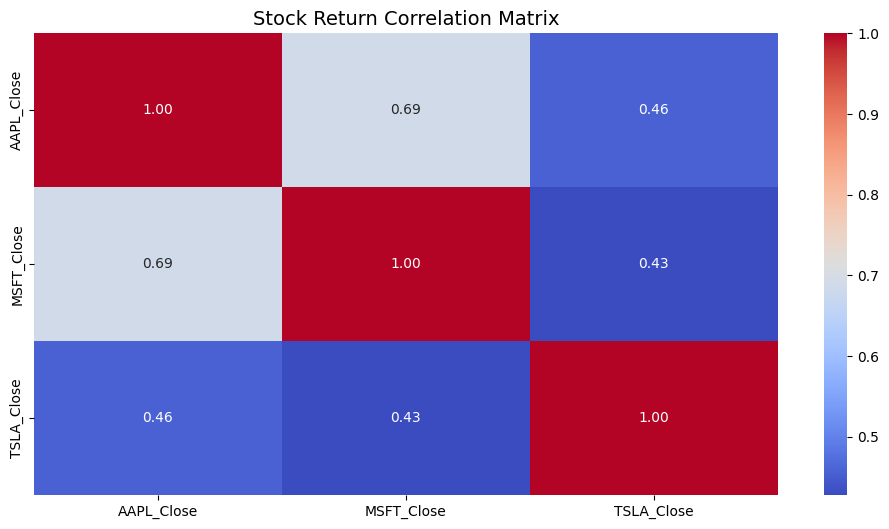

In [7]:
plt.figure(figsize=(12,6))

# This calculates how closely the price movements of different stocks follow each other
correlation_matrix = returns.corr()

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Stock Return Correlation Matrix', fontsize=14);

* **There is a strong positive correlation (typically > 0.7) between AAPL and MSFT, suggesting they respond similarly to market conditions.**

* **Tesla has a lower correlation with the others, meaning it can sometimes move independently, though it still follows the general tech sector trend.**

* **The high correlation explains why a market-wide event in 2025 caused all three stocks to decline simultaneously.**

In [8]:
# Calculate total return percentage for each asset
total_return = (df.iloc[-1] / df.iloc[0] - 1) * 100

# Calculate daily volatility using Standard Deviation
overall_risk = returns.std() * 100

summary = pd.DataFrame({
    'Total Growth (%)': total_return,
    'Average Daily Risk (%)': overall_risk
})

print("--- FINAL PROJECT SUMMARY ---")
print(summary.round(2))

--- FINAL PROJECT SUMMARY ---
            Total Growth (%)  Average Daily Risk (%)
AAPL_Close            589.41                    1.93
MSFT_Close            407.45                    1.80
TSLA_Close           1823.89                    4.00


# The data analysis reveals a clear trade-off between risk and reward:

* **Tesla (TSLA) is the absolute leader in terms of growth, providing a staggering 1823.89% return. However, it comes with the highest risk (4.00% daily volatility), meaning it is the most stressful asset for an investor.**

* **Apple (AAPL) and Microsoft (MSFT) offer more conservative but stable growth (approx. 400-580%) with much lower daily risk (under 2%).**

* **Strategy Insight: For a long-term portfolio, Microsoft remains the "stablest" choice, while Tesla is a high-reward asset for those who can tolerate extreme price swings.**